In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
import requests
from PIL import Image

Using TensorFlow backend.


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.optimizers import Adam

In [0]:
from keras.datasets import mnist
import random
from keras.utils.np_utils import to_categorical

In [4]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


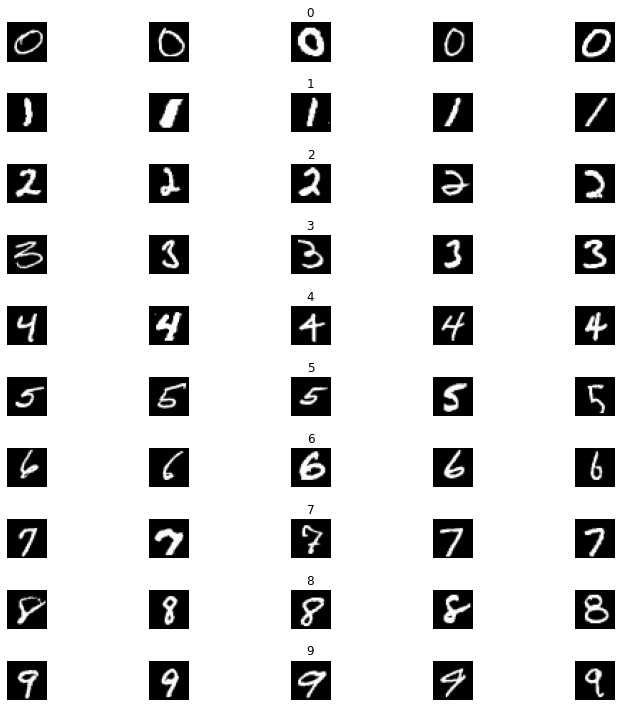

In [14]:
num_classes = 10

nrows = 10
ncols = 5
l = []

fig,axs = plt.subplots(nrows,ncols, figsize = (10,10))
fig.tight_layout()

for i in range(nrows):
  X_selected = X_train[y_train==i]
  l.append(len(X_selected))
  for j in range(ncols):
      axs[i][j].imshow(X_selected[random.randint(0,len(X_selected))-1,:,:],cmap = plt.get_cmap('gray'))
      axs[i][j].axis('off')
      if j == 2:
        axs[i][j].set_title(str(i))

Text(0.5, 1.0, 'Distribution of classes')

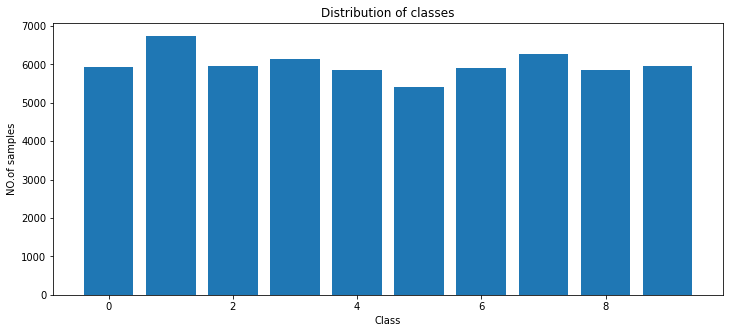

In [18]:
plt.figure(figsize = (12,5))
plt.bar(range(0,10),l)
plt.xlabel('Class')
plt.ylabel('NO.of samples')
plt.title('Distribution of classes')

In [0]:
y_train_cat = to_categorical(y_train,10)
y_test_cat  = to_categorical(y_test,10)

In [0]:
X_train_std = X_train/255.0
X_test_std = X_test/255.0

X_train_final = X_train_std.reshape(60000,28,28,1)
X_test_final = X_test_std.reshape(10000,28,28,1)

In [24]:
y_train_cat.shape

(60000, 10)

In [0]:
def lenet_model():
  model = Sequential()
  model.add(Conv2D(30,(5,5),input_shape = (28,28,1), activation = 'relu'))
  model.add(MaxPool2D((2,2)))
  model.add(Conv2D(15,(3,3),activation = 'relu'))
  model.add(MaxPool2D((2,2)))
  model.add(Flatten())
  model.add(Dense(500,activation = 'relu'))
  model.add(Dense(10,activation = 'softmax'))
  return model

In [0]:
model = lenet_model()

In [31]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 500)               188000    
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

In [33]:
model.compile(Adam(0.01),loss = 'categorical_crossentropy',metrics= ['accuracy'])
h = model.fit(X_train_final,y_train_cat,epochs = 10,batch_size = 400, validation_split=0.1,shuffle = True,verbose =1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 30s 548us/step - loss: 0.2110 - accuracy: 0.9371 - val_loss: 0.0566 - val_accuracy: 0.9823
Epoch 2/10
54000/54000 [==============================] - 29s 546us/step - loss: 0.0503 - accuracy: 0.9840 - val_loss: 0.0605 - val_accuracy: 0.9843
Epoch 3/10
54000/54000 [==============================] - 30s 552us/step - loss: 0.0373 - accuracy: 0.9882 - val_loss: 0.0526 - val_accuracy: 0.9852
Epoch 4/10
54000/54000 [==============================] - 30s 548us/step - loss: 0.0280 - accuracy: 0.9914 - val_loss: 0.0324 - val_accuracy: 0.9920
Epoch 5/10
54000/54000 [==============================] - 30s 551us/step - loss: 0.0231 - accuracy: 0.9927 - val_loss: 0.0390 - val_accuracy: 0.9887
Epoch 6/10
54000/54000 [==============================] - 30s 549us/step - loss: 0.0218 - accuracy: 0.9926 - val_loss: 0.0592 - val_accuracy: 0.9860
Epoch 7/10
54000/54000 [==============================] -

In [0]:
acc = h.history['accuracy']
loss = h.history['loss']
val_acc = h.history['val_accuracy']
val_loss = h.history['val_loss']

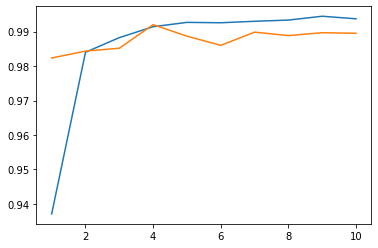

In [39]:
plt.plot(range(1,len(acc)+1),acc)
plt.plot(range(1,len(acc)+1),val_acc)

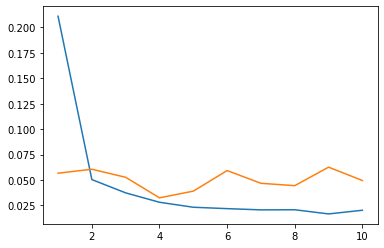

In [40]:
plt.plot(range(1,len(acc)+1),loss)
plt.plot(range(1,len(acc)+1),val_loss)

In [41]:
score = model.evaluate(X_test_final,y_test_cat)

10000/10000 [==============================] - 2s 210us/step


In [42]:
print('LOSS : ',score[0])
print('ACCURACY',score[1])

LOSS :  0.049731724597213534
ACCURACY 0.9878000020980835


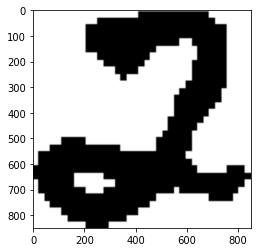

In [46]:
url = 'https://www.researchgate.net/profile/Jose_Sempere/publication/221258631/figure/fig1/AS:305526891139075@1449854695342/Handwritten-digit-2.png'
response = requests.get(url,stream = True)
img = Image.open(response.raw)
plt.imshow(img)

In [0]:
import cv2

img_np = np.asarray(img)

In [49]:
img_np.shape

(850, 850, 4)

In [0]:
img_size = cv2.resize(img_np,(28,28))

In [0]:
img_final = cv2.cvtColor(img_size,cv2.COLOR_BGR2GRAY)
img_final = cv2.bitwise_not(img_final)
img_final = img_final/255.0

In [0]:
img_final = img_final.reshape(1,28,28,1)

In [0]:
pred = model.predict_classes(img_final)

In [67]:
print('PREDICTION : ', str(pred[0]))

PREDICTION :  2


In [0]:
from keras.models import Model

In [0]:
layer1  = Model(model.layers[0].input, model.layers[0].output)
layer2 = Model(model.layers[0].input, model.layers[2].output)

In [0]:
visual_layer1 = layer1.predict(img_final)
visual_layer2 = layer2.predict(img_final)

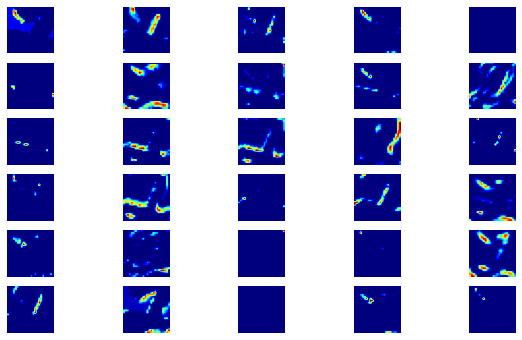

In [75]:
plt.figure(figsize=(10, 6))
for i in range(30):
    plt.subplot(6, 5, i+1)
    plt.imshow(visual_layer1[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')
 

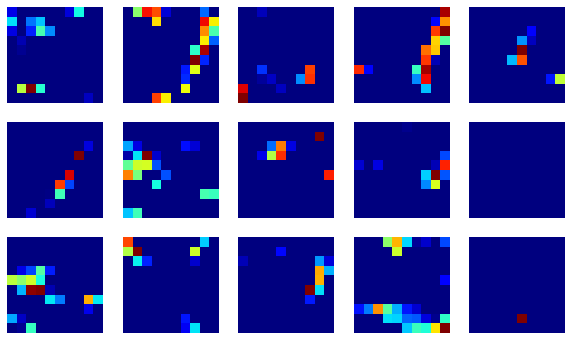

In [76]:
#layer 2
plt.figure(figsize=(10, 6))
for i in range(15):
    plt.subplot(3, 5, i+1)
    plt.imshow(visual_layer2[0, :, :, i], cmap=plt.get_cmap('jet'))
    plt.axis('off')